In [1]:
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage import data
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

from skimage.transform import SimilarityTransform
image = data.camera()


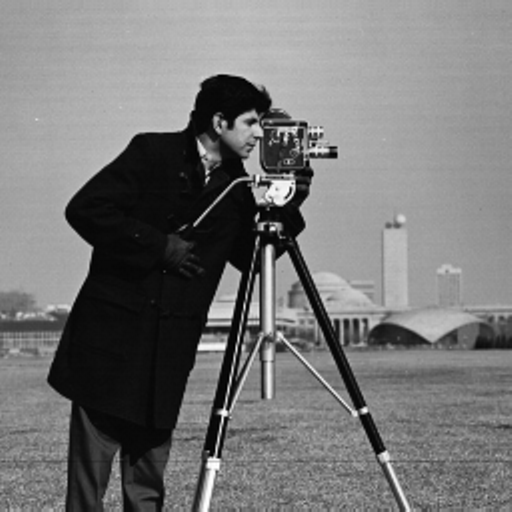

In [2]:
cv2_imshow(image)

For 30,-10

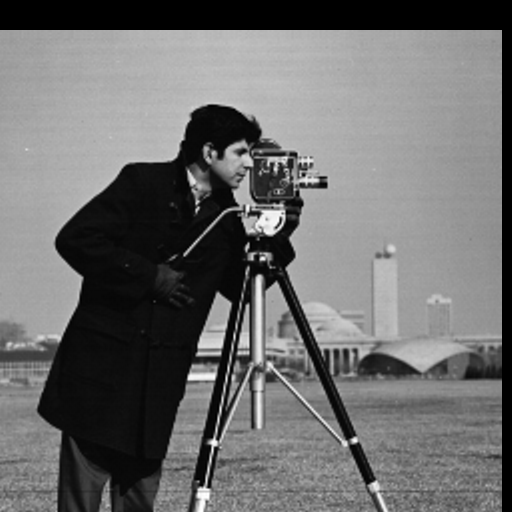

In [3]:
# Store height and width of the image 
height, width = image.shape[:2] 
  
quarter_height, quarter_width = 30,-10
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  
# We use warpAffine to transform 
# the image using the matrix, T 
img_translation = cv2.warpAffine(image, T, (width, height)) 
cv2_imshow(img_translation)

for 30,10

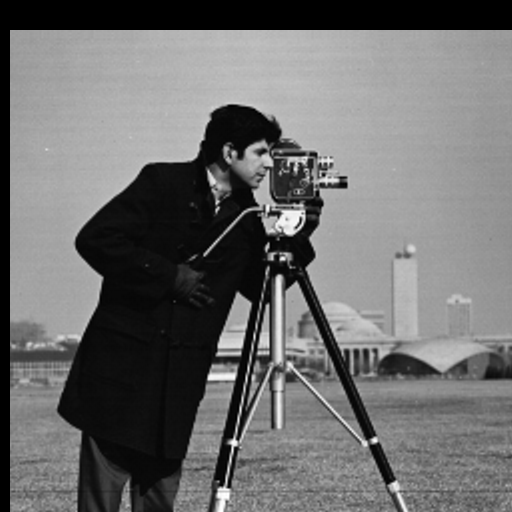

In [4]:
# Store height and width of the image 
height, width = image.shape[:2] 
  
quarter_height, quarter_width = 30,10
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  
# We use warpAffine to transform 
# the image using the matrix, T 
img_translation = cv2.warpAffine(image, T, (width, height)) 
cv2_imshow(img_translation)

Scaling

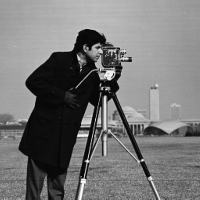

In [5]:
resized = cv2.resize(image,(200,200))
cv2_imshow(resized)

Rotation

In [6]:
center = (image.shape[1]//2, image.shape[0] //2) # Get the image center
rotation_matrix = cv2.getRotationMatrix2D(center, -45, 1) # Calculate the rotation matrix
new_img = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0])) # Transform input image


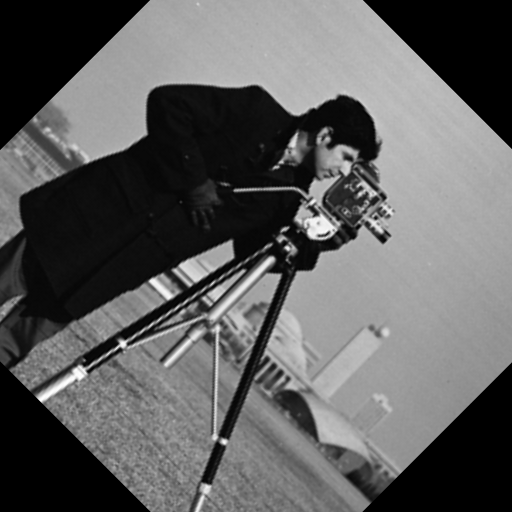

In [7]:
cv2_imshow(new_img)

###2.	Perform the following geometric transforms without using inbuilt functions.

a). Horizontal Shear

In [8]:
image = data.camera()
sh = 2
rows = image.shape[0]
cols = image.shape[1]

for i in range(rows):
  for j in range(cols):
    if((i+sh*j) >= 512):
      image[i,j] = 0
    else:
      image[i,j] = image[i + sh*j,j]
image = cv2.resize(image,(200,200))

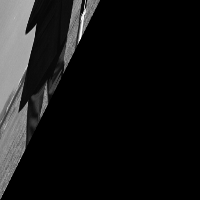

In [9]:
cv2_imshow(image)

Vertical Shear

In [10]:
image = data.camera()
sh = 1
rows = image.shape[0]
cols = image.shape[1]
for i in range(rows):
  for j in range(cols):
    if((j + sh*i) >= 512):
      image[i,j] = 0
    else:
      image[i,j] = image[i,j+ sh*i]

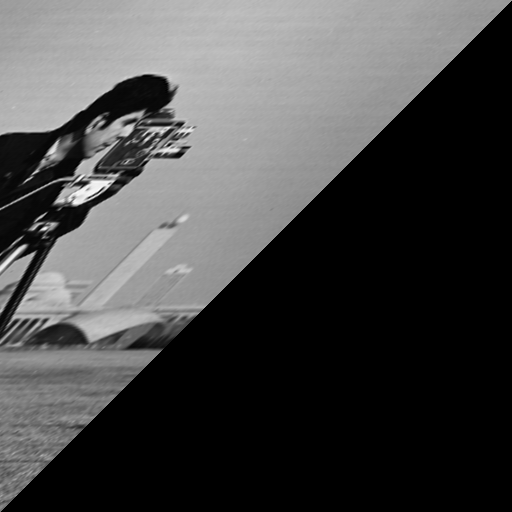

In [11]:
cv2_imshow(image)

###3. Salt-Pepper Noise

Adding salt-pepper noise

In [14]:
image = data.camera()
import random

def sp_noise(image, prob):

    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''

    output = np.zeros(image.shape,np.uint8)

    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

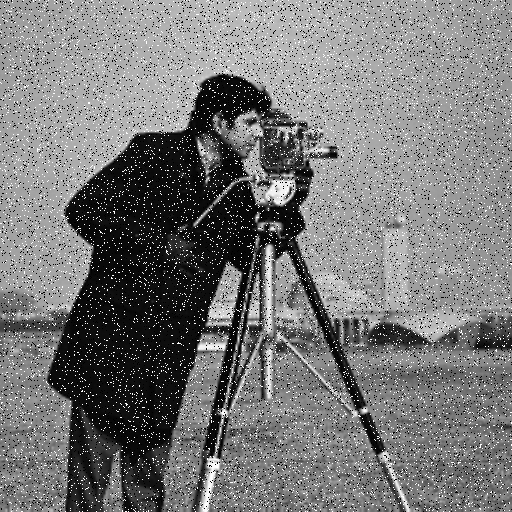

In [15]:
# Running the filter
noise_img = sp_noise(image,0.05)

cv2_imshow(noise_img)
# To reduce file size
# plt.imshow(noise_img, cmap='gray')

###2. Spatial Median Filter to remove Salt-Pepper

In [16]:
# Defining the median filter

def median_filter(filter_size, img):
  # Obtain number of rows and columns  
  # of the image 
  m, n = img.shape 
    
  # Convolve the 3X3 mask over the image  
  img_new = np.zeros([m, n]) 

  sub_fact = int(np.floor(filter_size/2))

  for i in range(1, m-sub_fact): 
      for j in range(1, n-sub_fact): 
          x = i-sub_fact
          temp = []

          # Masking 
          for k in range(filter_size):
            y = j-sub_fact
            for l in range(filter_size):
              temp.append(img[x, y])
              y+=1           
            x+=1
  
          temp.sort()
          img_new[i, j] = temp[len(temp) // 2]

  return img_new

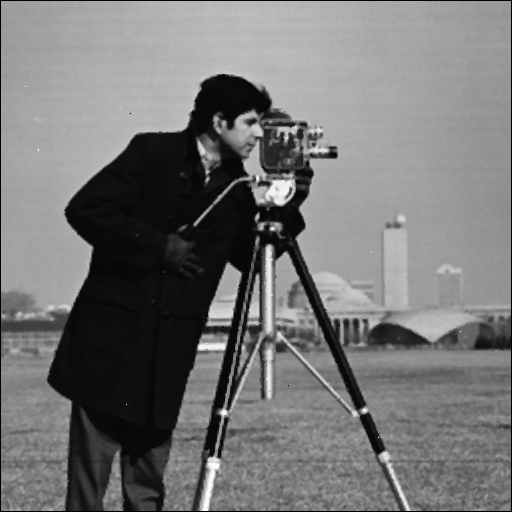

In [19]:
# Applying the filter
filtered_img = median_filter(3, noise_img)

# cv2_imshow(filtered_img)
# To reduce file size
cv2_imshow(filtered_img)

###3. Spatial Mean Filter to remove Salt-Pepper

In [20]:
# Defining the mean filter

def mean_filter(filter_size, img):
  # Obtain number of rows and columns  
  # of the image 
  m, n = img.shape 
    
  # Convolve the 3X3 mask over the image  
  img_new = np.zeros([m, n]) 

  sub_fact = int(np.floor(filter_size/2))

  for i in range(1, m-sub_fact): 
      for j in range(1, n-sub_fact): 
          x = i-sub_fact
          temp = []

          # Masking 
          for k in range(filter_size):
            y = j-sub_fact
            for l in range(filter_size):
              temp.append(img[x, y])
              y+=1           
            x+=1
  
          temp = np.array(temp)
          temp_mean = np.mean(temp)
          img_new[i, j] = temp_mean

  return img_new

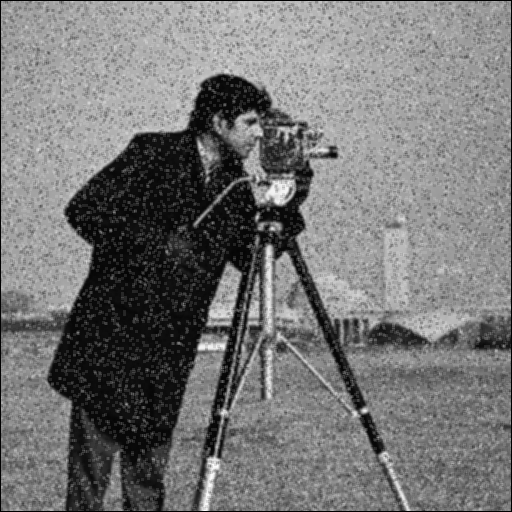

In [23]:
# Applying the filter
filtered_img_mean = mean_filter(3, noise_img)
cv2_imshow(filtered_img_mean)


##**Conclusion**
####This show that "Median Filter" gives a lot better image quality on the same filter size as compared to "Mean Filter".

